In [1]:
from weaPoints import WeaPoints, InterpolationMethod
from anemosData import TsNcWindData, WindDataKind
import numpy as np
import xarray
import pandas

# Loading power curve

In [2]:
path = r"./wea_data/example/test_wea.nc"
power_curves = xarray.open_dataset(path)
power_curves["test_wea"]

<xarray.DataArray 'test_wea' (wspd: 24502, rho: 3251)>
[79656002 values with dtype=float64]
Coordinates:
  * wspd     (wspd) float64 0.0 0.001 0.002 0.003 0.004 ... 24.5 24.5 24.5 24.5
  * rho      (rho) float64 0.95 0.9501 0.9502 0.9503 ... 1.275 1.275 1.275 1.275
Attributes:
    describtion:    interpolated Leistungskennlinie
    creation_date:  2022-01-25
    author:         Claudius Wehner

# Loading Points

In [3]:
size = 10
lon = np.around(np.random.uniform(6.0, 14.0, size=size),5)
lat = np.around(np.random.uniform(48.0, 55.0, size=size),5)
lat_lon_coor = np.stack((lat, lon), axis=1)
level = np.around(np.random.uniform(80.0, 140.0, size=size),1)

testPoints = WeaPoints(
    lat_lon_coor = lat_lon_coor,
    level = level,
    wea_types = ["test_wea"] * size,
    #interpolation_method = [InterpolationMethod.LINEAR] * size,
)

testPoints.point_list[:5]

[_WeaPoint(lat_lon_coor=array([51.47229, 11.71678]), level=133.3, wea_type='test_wea', x_y_coor=[67827.5356423567, 64767.5602875925]),
 _WeaPoint(lat_lon_coor=array([54.56288, 13.23528]), level=138.0, wea_type='test_wea', x_y_coor=[161170.25426953673, 410435.1387750503]),
 _WeaPoint(lat_lon_coor=array([49.10184,  8.64506]), level=81.1, wea_type='test_wea', x_y_coor=[-152055.03209351256, -196746.3999590129]),
 _WeaPoint(lat_lon_coor=array([52.98666,  6.82493]), level=139.3, wea_type='test_wea', x_y_coor=[-261436.4460501489, 239430.4810475296]),
 _WeaPoint(lat_lon_coor=array([49.97334, 10.66411]), level=96.8, wea_type='test_wea', x_y_coor=[-5134.181242834512, -102109.42497053539])]

# Get Time series

In [4]:
testPoints.get_power_output(power_curves=power_curves, time_frame=[2009,"2014-09-20"])

Passed time_frame valid!
time loaded
Windpower turbine 1 complete
Windpower turbine 2 complete
Windpower turbine 3 complete
Windpower turbine 4 complete
Windpower turbine 5 complete
Windpower turbine 6 complete
Windpower turbine 7 complete
Windpower turbine 8 complete
Windpower turbine 9 complete
Windpower turbine 10 complete


In [5]:
Eout = {}
for num, point in enumerate(testPoints.point_list):
    Eout[f"wea_{num+1}: {point.lat_lon_coor}"] = point.power_time_series

df = pandas.DataFrame(data=Eout,index=testPoints.time)
df.head()#.resample("14d").mean().plot(figsize=(22,6))

,wea_1: [51.47229 11.71678],wea_2: [54.56288 13.23528],wea_3: [49.10184 8.64506],wea_4: [52.98666 6.82493],wea_5: [49.97334 10.66411],wea_6: [53.98296 10.5459 ],wea_7: [52.41121 6.88875],wea_8: [48.11817 9.08949],wea_9: [49.22482 10.01972],wea_10: [54.3876 6.72212]
2009-01-01 00:00:00,143.149010,802.452785,0.0,142.955422,0.0,417.500942,128.512947,0.0,0.000000,1389.298872
2009-01-01 00:10:00,167.673421,918.659437,0.0,136.618954,0.0,503.686949,114.239826,0.0,0.000000,1414.641431
2009-01-01 00:20:00,209.061051,1042.321574,0.0,134.150379,0.0,607.199670,101.378706,0.0,0.000000,1373.457714
2009-01-01 00:30:00,273.126489,1013.362106,0.0,130.195510,0.0,740.544948,95.041405,0.0,101.868333,1255.476001
2009-01-01 00:40:00,364.599331,844.485034,0.0,128.699532,0.0,873.898098,91.498375,0.0,124.662414,1204.814921


<AxesSubplot:>

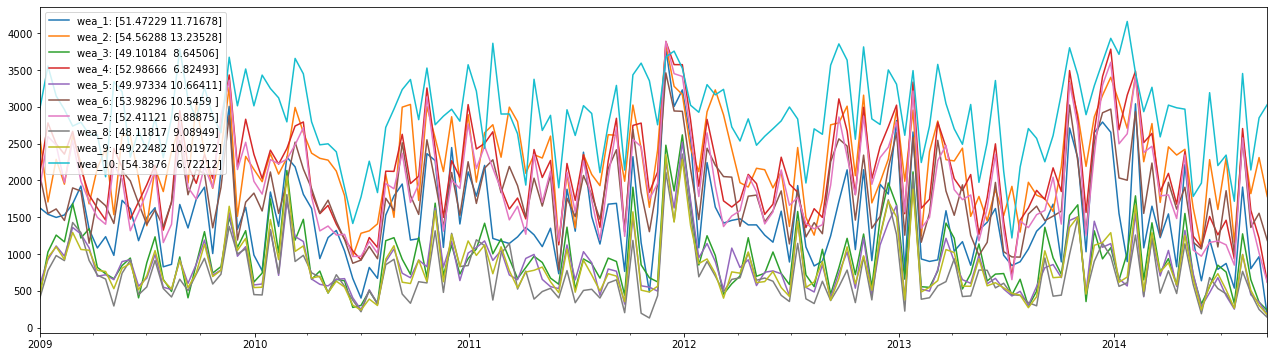

In [6]:
df.resample("14d").mean().plot(figsize=(22,6))

# 90m mean

In [102]:
import numpy as np

def weibull (v_i:np.array, A:float, k:float) -> np.array:
        return 1 - np.exp(-(v_i/A)**k)


def weibull_power(lkl, A, k, rho, s:float=0.85) -> float:
        F = weibull(v_i=lkl.wspd.to_numpy(), A=A, k=k)
        P = lkl.interp(rho=rho, method="linear").to_numpy()

        AEP_list = list()
        for i, _ in enumerate(F):
                if i == 0:
                        AEP_i = 8760 * F[i] * P[i]

                else:
                        AEP_i = 8760 * (F[i] - F[i-1]) * ((P[i] + P[i-1])/2)
                
                AEP_list.append(AEP_i)

        return sum(AEP_list) * s

In [103]:
path = r"/home/eouser/Documents/code/Windatlas/windatlas/anemos_data/wea_data/example/WEA_beispiel.csv"
power_curves = pandas.read_csv(path, delimiter=";", index_col=0)
power_curves = power_curves.reindex(sorted(power_curves.columns), axis=1)

rho = 1.227
k = 2
A = 6
v_mean = 7.7

lkl = xarray.DataArray(power_curves).rename({"dim_0":"wspd", "dim_1":"rho"})
lkl = lkl.assign_coords(rho=np.float64(lkl.rho))

print(weibull_power(lkl, A, k, rho, s=1))

10158411.857001599
